In [ ]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('whitegrid')
%matplotlib inline

## 1. clicks_train.csv is the training set, showing which of a set of ads was clicked.

In [ ]:
clicks_train = pd.read_csv('./data/clicks_train.csv',  dtype={"display_id": int, "ad_id": int, "clicked": int})

In [ ]:
clicks_test = pd.read_csv('./data/clicks_test.csv',  dtype={"display_id": int, "ad_id": int, "clicked": int})

## Most recommendations show 4 or 6 options

In [ ]:
clicks_train['ad_id'].groupby(clicks_train['display_id']).size().hist()

## 2. events.csv provides information on the display_id context. It covers both the train and test set.

In [ ]:
events_df = pd.read_csv('./data/events.csv',  dtype={"display_id": int, "uuid": str, "document_id": int, "timestamp": int, "platform": str, "geo_location": str})

In [ ]:
timestamps = events_df.timestamp
## normalization to start of day
timestamps = ((((timestamps + 1465876799998)/1000)//(3600*24)) * 3600 * 24).apply(datetime.fromtimestamp)


## Events over the 15 day period

In [ ]:
plt.figure(figsize=(12,4))
timestamps.hist(bins=15)

## Events over the day: Most ads clicked after 2:00 PM UTC (0 is 4:00 AM UTC)

In [ ]:
## normalization to start of hour
timestamps_hrly = (events_df.timestamp // (3600 * 1000)) % 24


In [ ]:
timestamps_hrly.hist(bins=24)

In [ ]:
train = clicks_train.drop_duplicates(['display_id']).merge(events_df[['display_id', 'timestamp']])

In [ ]:
test = clicks_test.drop_duplicates(['display_id'])

In [ ]:
test = test.merge(events_df[['display_id', 'timestamp']])
test.head()

## Test data and train data comparison

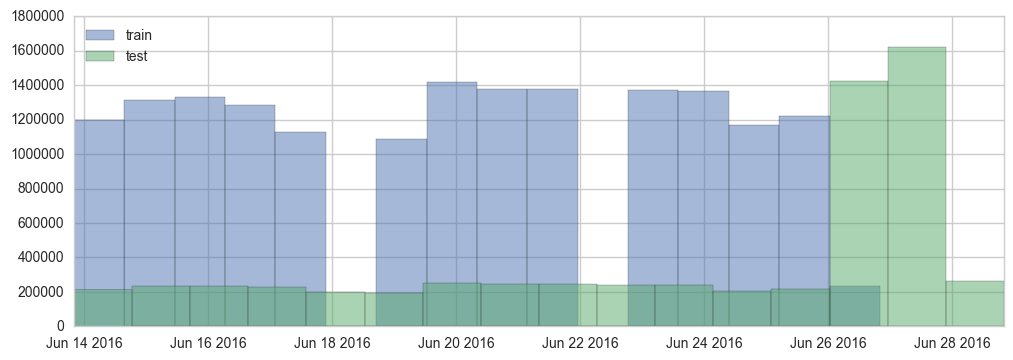

In [30]:
plt.figure(figsize=(12,4))
train_daily = ((((train.timestamp + 1465876799998)/1000)//(3600*24)) * 3600 * 24).apply(datetime.fromtimestamp)
test_daily = ((((test.timestamp + 1465876799998)/1000)//(3600*24)) * 3600 * 24).apply(datetime.fromtimestamp)
train_daily.hist(bins=16, label="train", alpha=0.5)
test_daily.hist(bins=16, label="test", alpha=0.5)
plt.legend(loc="best")
